<a href="https://colab.research.google.com/github/szeshiang/Deep-Learning/blob/main/25_Feb_24_Fashion_Mnist_Assignment_Seq_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the dataset
from tensorflow.keras.datasets import fashion_mnist
print('Data loaded')

Data loaded


In [2]:
# create train & test
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
# preprocessing
# Reshape the training and test data
# normally will pass flattened data for ease of NN learning
# - high D data to low D data
# - hence reshape from 2D/3D to 1D
X_train_reshaped=X_train.reshape(60000,784)
X_test_reshaped=X_test.reshape(10000,784)

In [6]:
X_train_reshaped.shape

(60000, 784)

In [7]:
# normalize the pixel in 0 to 1
X_train_reshaped=X_train_reshaped/255.
X_test_reshaped=X_test_reshaped/255.

In [10]:
# convert class vectors into one hot encoding
from tensorflow.keras.utils import to_categorical
num_classes=10
y_train_enocoded=to_categorical(y_train,num_classes)
y_test_enocoded=to_categorical(y_test,num_classes)

In [13]:
# 1. import req lib
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('imported')

imported


In [18]:
# create  architecture - decide to have 4 layers of NN, (100, 64, 32, 32) neurons, activation relu for hidden layer, output layer - softmax
model=Sequential()
# first hidden layer
model.add(Dense(100,activation='relu',input_shape=(784,)))
model.add(Dropout(0.3))
# second hidden layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
# third hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
# forth hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                6464      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 32)               

In [27]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('model is compiled')

early_stop=EarlyStopping(monitor='val_loss',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,
                         patience=10
                         )

epochs=50

model is compiled


In [28]:
# train the model
history=model.fit(X_train_reshaped,y_train_enocoded,
                  batch_size=128,
                  epochs=epochs,
                  validation_data=(X_test_reshaped,y_test_enocoded),
                  callbacks=[early_stop]
                  )

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 1.0264 - accuracy: 0.6138 - val_loss: 0.5434 - val_accuracy: 0.7895
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.6237 - accuracy: 0.7808 - val_loss: 0.4739 - val_accuracy: 0.8359
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.5503 - accuracy: 0.8142 - val_loss: 0.4367 - val_accuracy: 0.8437
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.5118 - accuracy: 0.8278 - val_loss: 0.4224 - val_accuracy: 0.8505
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4882 - accuracy: 0.8356 - val_loss: 0.4172 - val_accuracy: 0.8579
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4695 - accuracy: 0.8415 - val_loss: 0.4275 - val_accuracy: 0.8474
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.4548 - accuracy: 0.8447 - val_loss: 0.4023 - val_accuracy: 0.8505
Epoch 

In [29]:
score_train=model.evaluate(X_train_reshaped,y_train_enocoded)
print('train score',score_train)
score_test=model.evaluate(X_test_reshaped,y_test_enocoded)
print('test score',score_test)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8984
train score [0.2813332974910736, 0.8983833193778992]
313/313 [==============================] - 1s 2ms/step - loss: 0.3696 - accuracy: 0.8714
test score [0.36958494782447815, 0.871399998664856]


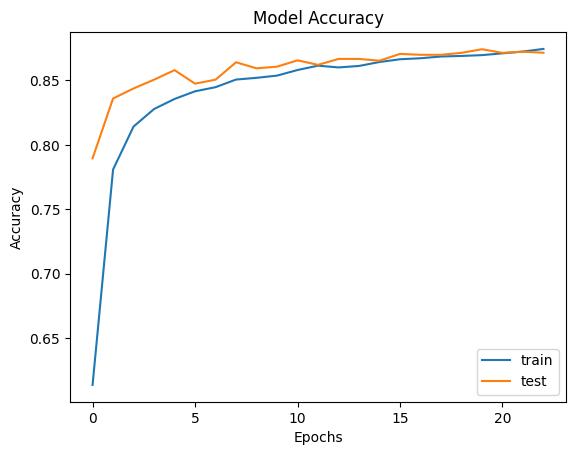

In [31]:
# plot the graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

In [32]:
from tensorflow.keras.layers import BatchNormalization

In [34]:
# Create Architecture - decide to have 4 layers of NN, (100, 64, 32, 32), activation relu , output layer-softmax
modelA=Sequential()
# first hidden layer
modelA.add(Dense(100,activation='relu',input_shape=(784,)))
modelA.add(BatchNormalization())
# second hidden layer
modelA.add(Dense(64,activation='relu'))
modelA.add(BatchNormalization())
# third hidden layer
modelA.add(Dense(32,activation='relu'))
modelA.add(BatchNormalization())
# forth hidden layer
modelA.add(Dense(32,activation='relu'))
modelA.add(BatchNormalization())

# output layer
modelA.add(Dense(10,activation='softmax'))

In [35]:
modelA.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_4 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 64)                6464      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_6 (Bat  (None, 32)               

In [36]:
# compile the model
modelA.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('modelA is compiled')

early_stop=EarlyStopping(monitor='val_loss',
                         min_delta=0.01,
                         mode='min',
                         verbose=1,
                         patience=10
                         )

epochs=50

modelA is compiled


In [37]:
# train the model with batch norm
history=modelA.fit(X_train_reshaped,y_train_enocoded,
                  batch_size=128,
                  epochs=epochs,
                  validation_data=(X_test_reshaped,y_test_enocoded),
                  callbacks=[early_stop]
                  )

Epoch 1/50
469/469 [==============================] - 6s 7ms/step - loss: 0.5406 - accuracy: 0.8173 - val_loss: 0.5024 - val_accuracy: 0.8192
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3708 - accuracy: 0.8661 - val_loss: 0.4402 - val_accuracy: 0.8442
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3390 - accuracy: 0.8769 - val_loss: 0.3965 - val_accuracy: 0.8566
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3136 - accuracy: 0.8845 - val_loss: 0.3858 - val_accuracy: 0.8621
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2986 - accuracy: 0.8904 - val_loss: 0.3741 - val_accuracy: 0.8660
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2854 - accuracy: 0.8950 - val_loss: 0.4025 - val_accuracy: 0.8554
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2706 - accuracy: 0.9007 - val_loss: 0.3871 - val_accuracy: 0.8652
Epoch 

In [38]:
score_train=modelA.evaluate(X_train_reshaped,y_train_enocoded)
print('train score',score_train)
score_test=modelA.evaluate(X_test_reshaped,y_test_enocoded)
print('test score',score_test)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2425 - accuracy: 0.9084
train score [0.24245931208133698, 0.9084333181381226]
313/313 [==============================] - 1s 4ms/step - loss: 0.4194 - accuracy: 0.8635
test score [0.4194397032260895, 0.8634999990463257]
